In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# # Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
# plt.rcParams["figure.figsize"] = fig_siz

Current size: [6.0, 4.0]


In [15]:
cus_df = pd.read_csv('C:\Users\SneghaJ\Documents\Python Scripts\ML\K_Means_Clustering\University_Clustering(1).xlsx')
cus_df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [4]:
# split continuous and categorical data
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [5]:
for col in categorical_features:
    dummies = pd.get_dummies(cus_df[col], prefix=col)
    cus_df = pd.concat([cus_df, dummies], axis=1)
    cus_df.drop(col, axis=1, inplace=True)
    
cus_df.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Channel_1  \
0  12669  9656     7561     214              2674        1338          0   
1   7057  9810     9568    1762              3293        1776          0   
2   6353  8808     7684    2405              3516        7844          0   
3  13265  1196     4221    6404               507        1788          1   
4  22615  5410     7198    3915              1777        5185          0   

   Channel_2  Region_1  Region_2  Region_3  
0          1         0         0         1  
1          1         0         0         1  
2          1         0         0         1  
3          0         0         0         1  
4          1         0         0         1

In [6]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(cus_df)
data_transformed = mms.transform(cus_df)

In [7]:
WcSS = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    WcSS.append(km.inertia_)

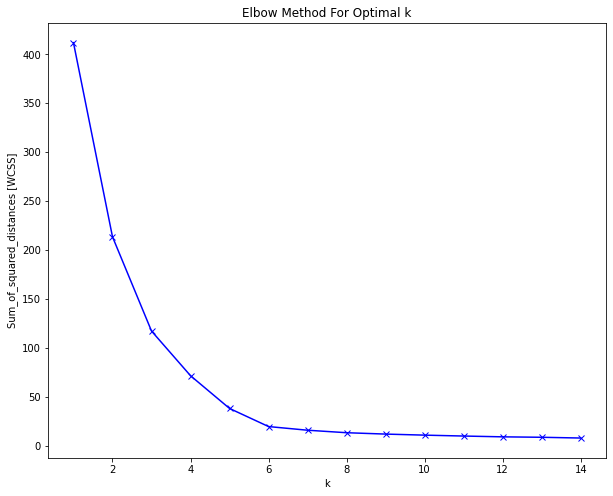

In [8]:
plt.plot(K,WcSS, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances [WCSS]')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
kmeans_model = KMeans(n_clusters=6,init = 'k-means++',random_state=0)
y_label = kmeans_model.fit_predict(data_transformed)

In [10]:
y_label

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 4, 5, 4, 5, 5, 4, 5,

In [11]:
import numpy as np
unique, counts = np.unique(y_label, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 211]
 [  1  59]
 [  2 105]
 [  3  18]
 [  4  28]
 [  5  19]]


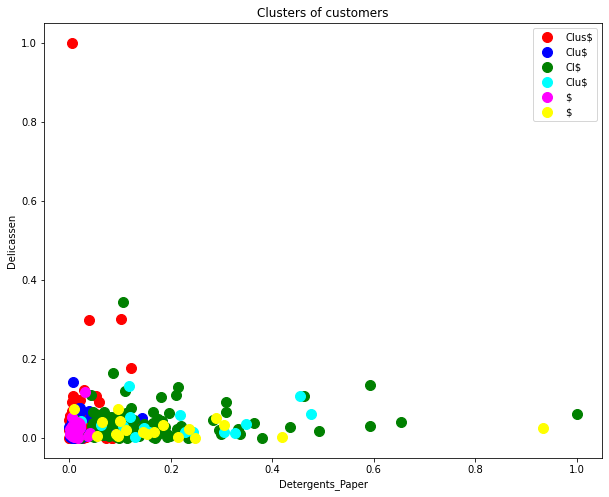

In [12]:
plt.scatter(data_transformed[y_label== 0, 4],data_transformed[y_label == 0, 5], s = 100, c = 'red', label = 'Clus$')
plt.scatter(data_transformed[y_label == 1, 4],data_transformed[y_label == 1, 5], s = 100, c = 'blue', label = 'Clu$')
plt.scatter(data_transformed[y_label == 2, 4],data_transformed[y_label == 2, 5], s = 100, c = 'green', label = 'Cl$')
plt.scatter(data_transformed[y_label == 3, 4],data_transformed[y_label == 3, 5], s = 100, c = 'cyan', label = 'Clu$')
plt.scatter(data_transformed[y_label == 4, 4], data_transformed[y_label == 4, 5], s = 100, c = 'magenta', label = '$')
plt.scatter(data_transformed[y_label == 5, 4], data_transformed[y_label == 5, 5], s = 100, c = 'yellow', label = '$')
plt.title('Clusters of customers')
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.legend()
plt.show()